In [1]:
#import packages
!pip install scikit-surprise


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#data preperation
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import KNNWithZScore
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

events_df = pd.read_csv('D:\MyCode\project\dataset\\processed events.csv').drop(columns='Unnamed: 0')
events_df.astype("int32")
events_df=events_df.fillna(0).astype(int)
reader = Reader(rating_scale=(1, 6))
data = Dataset.load_from_df(events_df[['visitorid', 'itemid', 'event']], reader)

experiment below

In [6]:
"""
change "param_grid" and "gs" to do research on new parameter. Parameters stated in grid research parameters.txt

like
param_grid = {'n_epochs': range(5,101,5)}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
"""

param_grid = {'n_epochs': range(5,101,5)}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
print(gs.cv_results)



{'split0_test_rmse': array([0.97683328, 0.96868968]), 'split1_test_rmse': array([0.99237581, 0.98610813]), 'split2_test_rmse': array([0.97874454, 0.97267434]), 'mean_test_rmse': array([0.98265121, 0.97582405]), 'std_test_rmse': array([0.00692046, 0.00745167]), 'rank_test_rmse': array([2, 1], dtype=int64), 'mean_fit_time': array([2.66399662, 4.78879277]), 'std_fit_time': array([0.04223911, 0.01590845]), 'mean_test_time': array([0.74658298, 0.76945655]), 'std_test_time': array([0.13324737, 0.00995525]), 'params': [{'n_epochs': 5}, {'n_epochs': 10}], 'param_n_epochs': [5, 10]}


In [8]:
"""
change "x_data" to fit the results. See cv_results for the parameter name.

like x_data=gs_data["param_n_epochs"]
"""

gs_data=gs.cv_results
x_data=gs_data["param_n_epochs"]
y_data=gs_data["mean_test_rmse"]

In [10]:
#test cell
y_data

array([0.98265121, 0.97582405])

In [11]:
plt_data={}
for i in range(len(x_data)):
    plt_data[x_data[i]]=y_data[i]
# show the data
plt_data

{5: 0.982651212990656, 10: 0.9758240509387578}

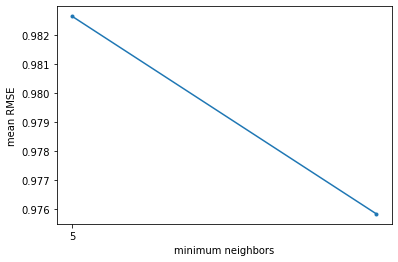

In [12]:
"""
change "xlabel" and "xticks" to fit the results.
"""

plt.xlabel("minimum neighbors")
plt.xticks(np.arange(1,6,1))
plt.ylabel("mean RMSE")
plt.plot(plt_data.keys(),plt_data.values(),marker=".")





